In [1]:
import karstnet as kn
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import sqlite3
# from collections import defaultdict
import function_celia as fc




![title](data/data_GouffreDejaVu/GouffreDejaVu.png)


 This network contains  1  connected components
There is no properties data

Graph successfully created from file !



Text(0, 0.5, 'z')

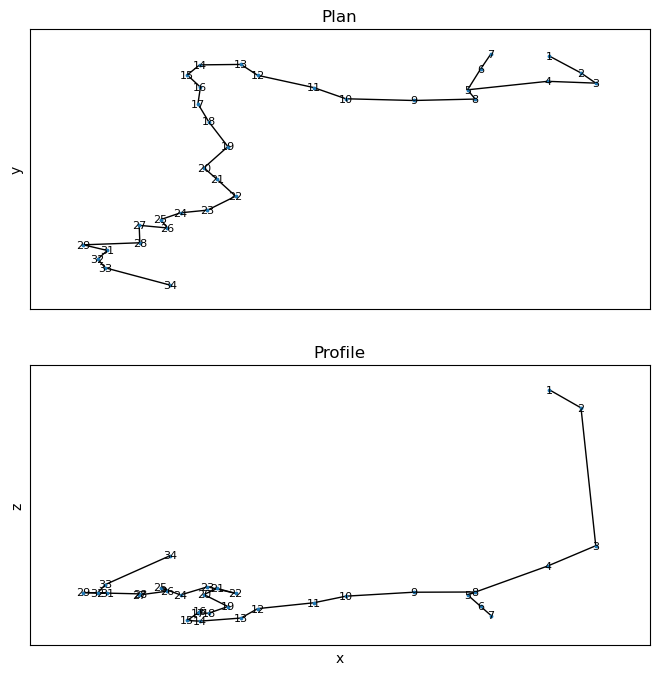

In [7]:


basename = 'data/data_GouffreDejaVu/GouffreDejaVu'

#extract additional data from sql therion
flag_station = fc.load_flag_station(basename)
flag_shot = fc.load_flag_shot(basename)
splays = fc.load_splays(basename)
station_names = fc.load_station_name(basename)

kg = kn.from_therion_sql(basename, verbose=True, properties=None)

fig,ax = plt.subplots(2,figsize=(8, 8),sharex=True)

ax[0].set_title('Plan')
nx.draw_networkx(kg.graph,
                pos=kg.pos2d,
                labels=station_names,
                with_labels=True,
                font_size=8,
                node_size=3,
                ax=ax[0])
#ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
#ax[0].set_aspect('equal')

ax[1].set_title('Profile')
nx.draw_networkx(kg.graph,
                pos=kg.nodes_xz,
                labels=station_names,
                with_labels=True,
                font_size=8,
                node_size=3,
                ax=ax[1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
#ax[1].set_aspect('equal')


In [9]:
def calc_geommean_radius(width,height):
    return np.sqrt((width/2)*(height/2))

#calculate geometry
conduit_directions = fc.get_conduit_direction(kg)
splays_direction = fc.get_splay_direction(kg,splays)

projected_splays_u, projected_splays_v, width, height= fc.calc_conduit_dimensions(conduit_directions,splays_direction)

#calculate area
conduit_ellipse_area={}
for key in list(splays.keys()):   
    #calculate area based on an ellipse
    conduit_ellipse_area[key]=(width[key]/2)*(height[key]/2)*np.pi

geommean_radius = calc_geommean_radius(np.array(list(width.values())),np.array(list(height.values())))

# import manual data
manual_data = pd.read_csv('C:/Users/celia/github/karst_networks/data/data_GouffreDejaVu/GouffreDejaVu_manual_measurements.csv',
                          sep=';', dtype={'station_name': str})
manual_data['area'] = (manual_data.height/2) * (manual_data.width/2) * np.pi
manual_data['geommean_radius'] = calc_geommean_radius(np.array(manual_data.width),np.array(manual_data.height))



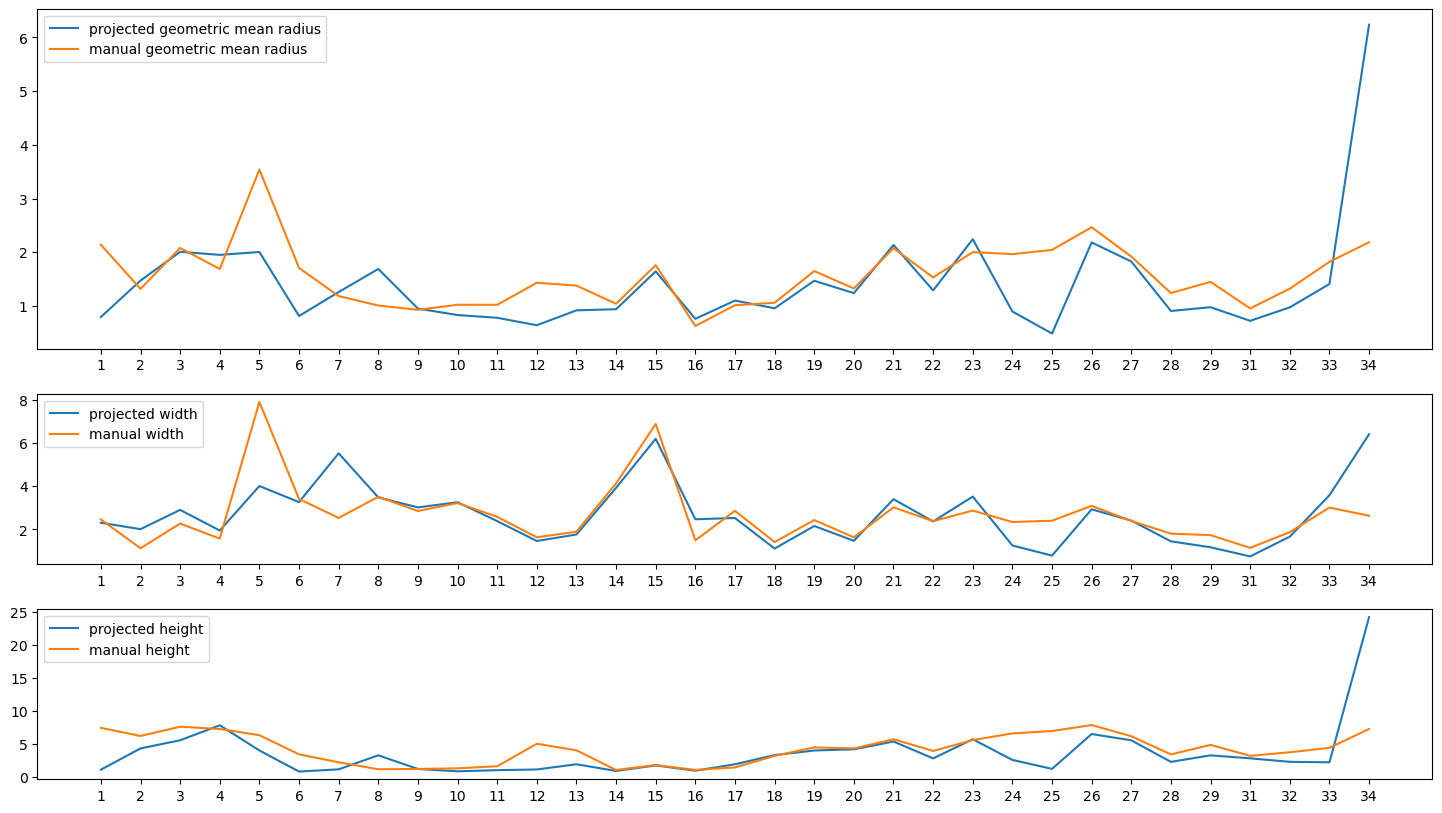

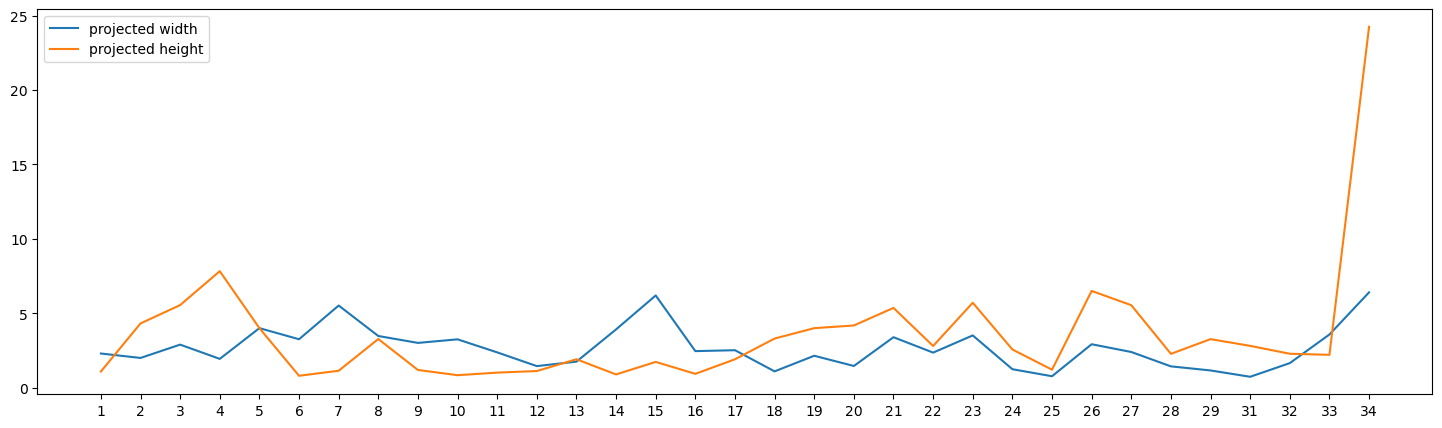

In [12]:
fig,ax = plt.subplots(3,gridspec_kw={'height_ratios': [2,1, 1]},figsize=(18,10))

ax[0].plot(station_names.values(),geommean_radius,label='projected geometric mean radius')
ax[0].plot(manual_data.station_name, manual_data.geommean_radius,label='manual geometric mean radius')
ax[0].legend()

ax[1].plot(station_names.values(),width.values(),label='projected width')
ax[1].plot(manual_data.station_name, manual_data.width,label='manual width')
ax[1].legend()

ax[2].plot(station_names.values(),height.values(),label='projected height')
ax[2].plot(manual_data.station_name, manual_data.height,label='manual height')
ax[2].legend()

fig,ax = plt.subplots(figsize=(18,5))
ax.plot(station_names.values(),width.values(),label='projected width')
ax.plot(station_names.values(),height.values(),label='projected height')
ax.legend()

C:\Users\celia\AppData\Local\Temp\ipykernel_22328\4229163052.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(5,5))


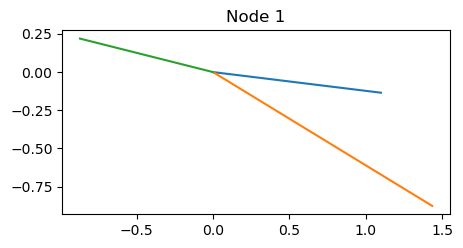

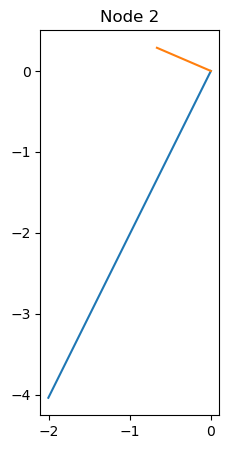

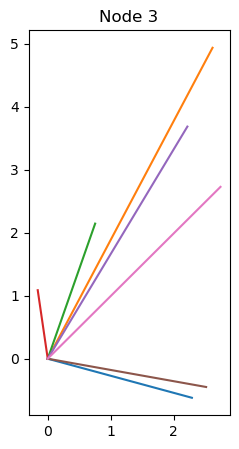

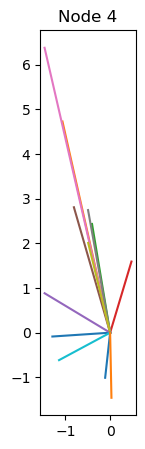

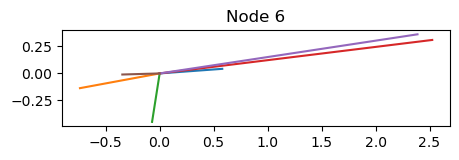

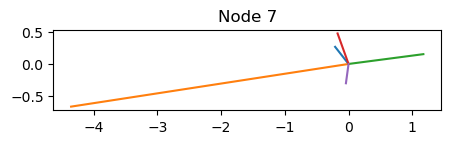

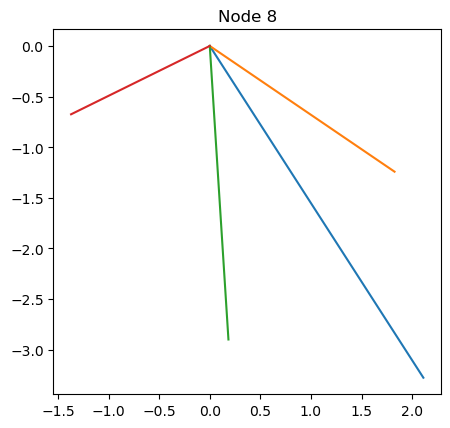

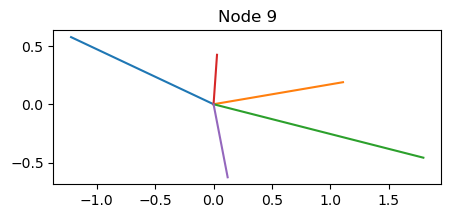

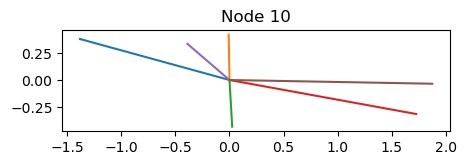

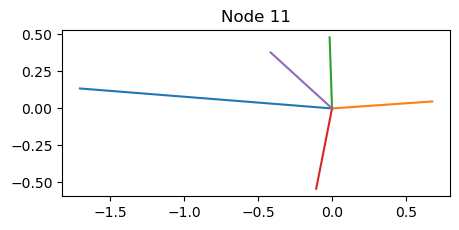

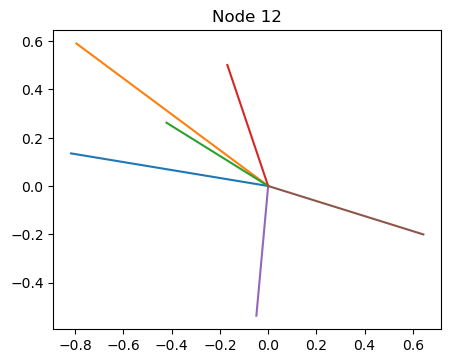

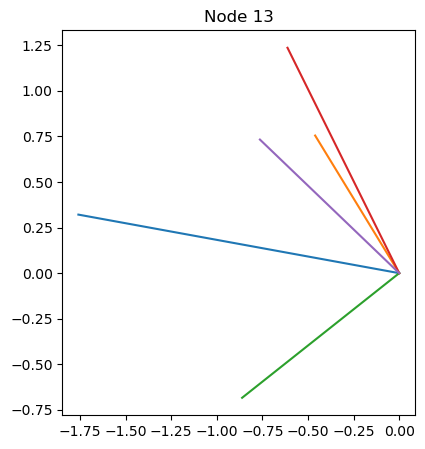

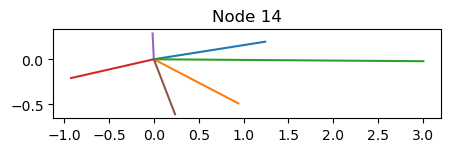

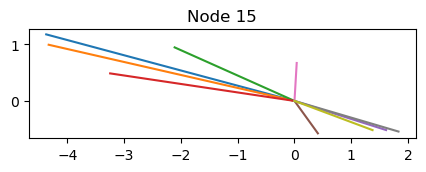

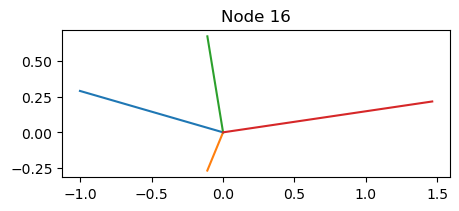

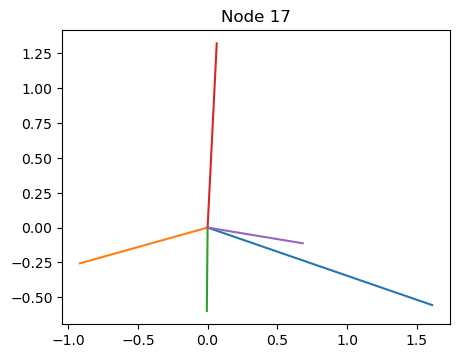

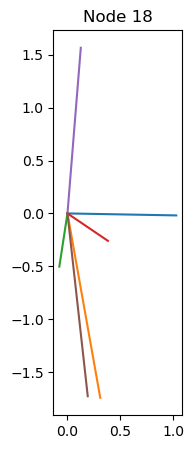

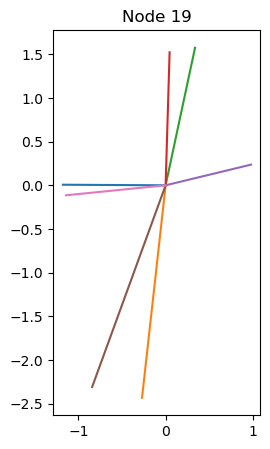

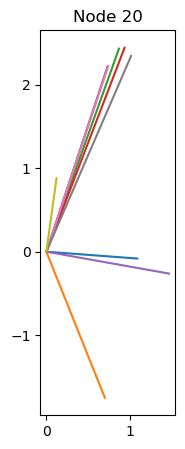

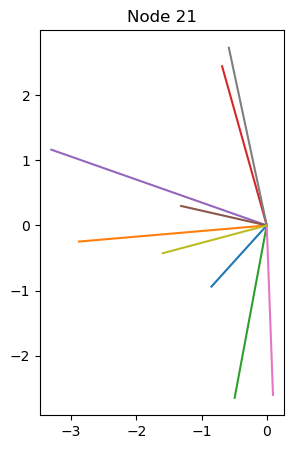

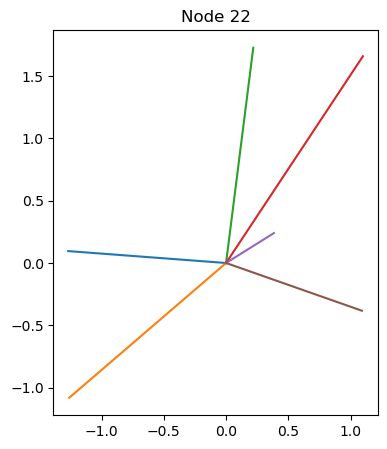

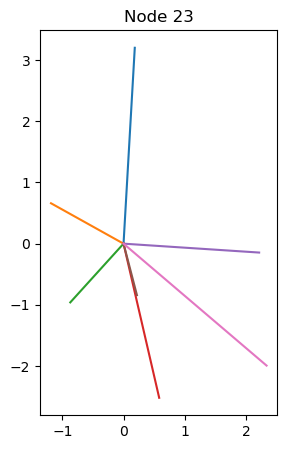

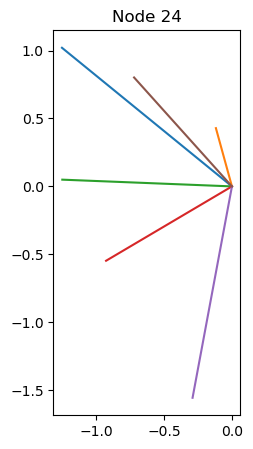

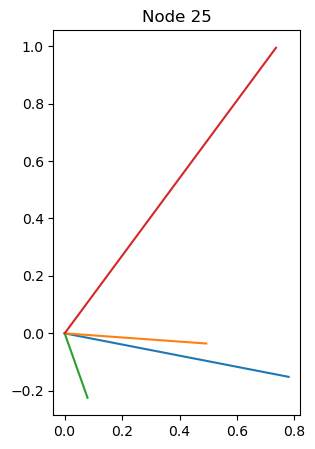

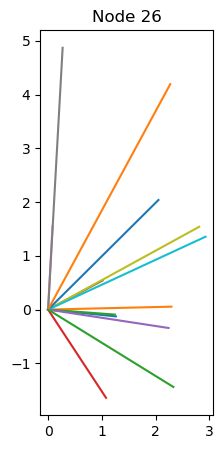

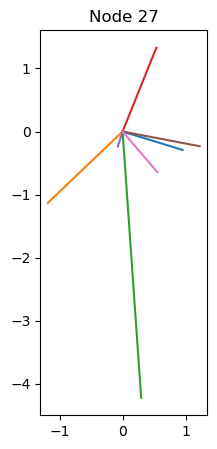

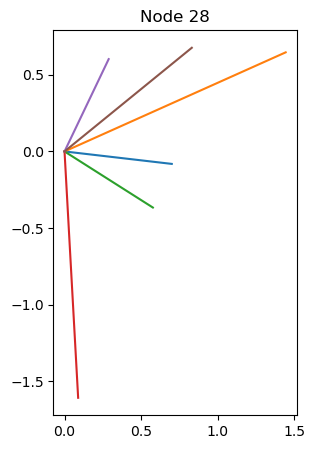

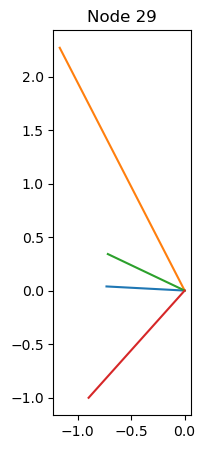

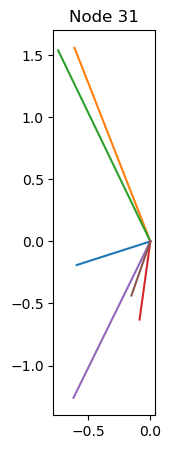

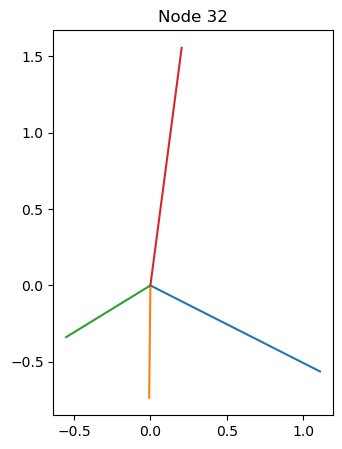

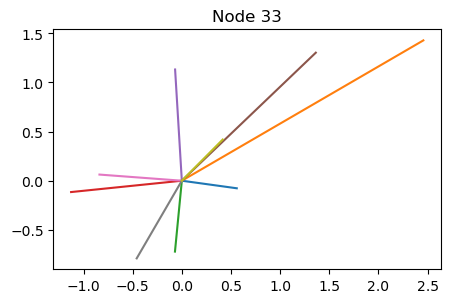

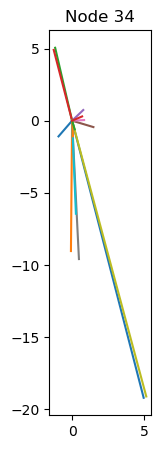

In [33]:

for key in projected_splays_u:
    fig,ax = plt.subplots(figsize=(5,5))
    for i in np.arange(len(projected_splays_u[key])):
        ax.set_title('Node %s'%station_names[key])
        ax.plot([0,projected_splays_u[key][i]],[0,projected_splays_v[key][i]],linestyle='-')
        ax.set_aspect('equal', 'box')




